In [1]:
import pandas as pd

df = pd.read_excel('data.xlsx')

print(df)

    Mã số  Màu da   Chiều cao    Cân nặng  Thể thao Sức khỏe
0        1    Nâu        Thấp  Trung bình  Cầu lông   Loại 2
1        2  Trắng        Thấp         Nhẹ   Bóng đá   Loại 1
2        3   Vàng         Cao         Nhẹ   Bóng rổ   Loại 1
3        4   Vàng        Thấp  Trung bình   Bóng đá   Loại 2
4        5  Trắng         Cao        Nặng  Cầu lông   Loại 1
5        6   Vàng  Trung bình  Trung bình  Cầu lông   Loại 2
6        7    Nâu  Trung bình        Nặng   Bóng đá   Loại 2
7        8    Nâu         Cao        Nặng   Bóng đá   Loại 2
8        9   Vàng        Thấp         Nhẹ  Cầu lông   Loại 1
9       10  Trắng         Cao         Nhẹ   Bóng rổ        ?
10      11    Nâu         Cao        Nặng   Bóng rổ        ?


In [2]:
X_labels = ['Màu da','Chiều cao','Cân nặng','Thể thao']
Y_label = 'Sức khỏe'

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for label in df:
  df[label] = le.fit_transform(df[label])

print(df)
X = []
Y = []
for idx in range(len(df)):
  temp = []
  for label in X_labels:
    temp.append(df.iloc[idx][label])
  X.append(temp)
  Y.append(df.iloc[idx][Y_label])

x_train, x_test, y_train, y_test = X[:9], X[9:], Y[:9], Y[9:]

    Mã số   Màu da  Chiều cao  Cân nặng  Thể thao  Sức khỏe
0        0       0          1         2         2         2
1        1       1          1         0         1         1
2        2       2          0         0         0         1
3        3       2          1         2         1         2
4        4       1          0         1         2         1
5        5       2          2         2         2         2
6        6       0          2         1         1         2
7        7       0          0         1         1         2
8        8       2          1         0         2         1
9        9       1          0         0         0         0
10      10       0          0         1         0         0


In [11]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(x_train, y_train)

pred = clf.predict(x_test)
print(pred)

[1 2]


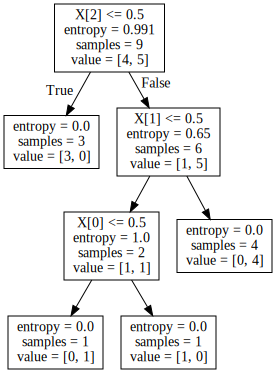

In [8]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph